# Electiva: Fundamentos de Inteligencia Artificial 🤖
---
### Práctica 2: Regresión Lineal
Samuel Alonso
<p></p>
Francis Bompart

<h1>📍Parte 1. Algoritmo De Regresion Lineal con Minimos Cuadrados</h1>

<h4>Para empezar primero se hacen las importaciones de las librerias necesarias para este problema, que en este caso son: numpy para el manejo de los arreglos y operaciones, sympy para crear la funcion afin con respecto a x, matplotlib para la creacion de los graficos, pandas para el manejo de los datos suministrados</h4>

In [3]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import pandas as panda

<h4>Luego se hace la lectura de los datos con la libreria pandas, luego se filtran los que vamos a utilizar, en este caso los que sean de la especie Bream, y posteriomente desplegamos los datos para visualizarlos</h4>

In [7]:
fish= panda.read_csv("./content/Fish.csv")
#seleccion de los datos solamente de la especie bream
fish= fish[fish.Species=="Bream"]

#Impresion de los datos
print(fish)

   Species  Weight  Length1  Length2  Length3   Height   Width
0    Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1    Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2    Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3    Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4    Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
5    Bream   450.0     26.8     29.7     34.7  13.6024  4.9274
6    Bream   500.0     26.8     29.7     34.5  14.1795  5.2785
7    Bream   390.0     27.6     30.0     35.0  12.6700  4.6900
8    Bream   450.0     27.6     30.0     35.1  14.0049  4.8438
9    Bream   500.0     28.5     30.7     36.2  14.2266  4.9594
10   Bream   475.0     28.4     31.0     36.2  14.2628  5.1042
11   Bream   500.0     28.7     31.0     36.2  14.3714  4.8146
12   Bream   500.0     29.1     31.5     36.4  13.7592  4.3680
13   Bream   340.0     29.5     32.0     37.3  13.9129  5.0728
14   Bream   600.0     29.4     32.0     37.2  14.9544 

<h4>Se separan los datos requeridos, en este caso la altura y el peso de los peces, guardando cada una en una variable, xi tomando la altura y yi tomando el peso, posteriormente se utiliza la libreria matplot para hacer la graficacion de los datos</h4>

Text(0, 0.5, 'Weight')

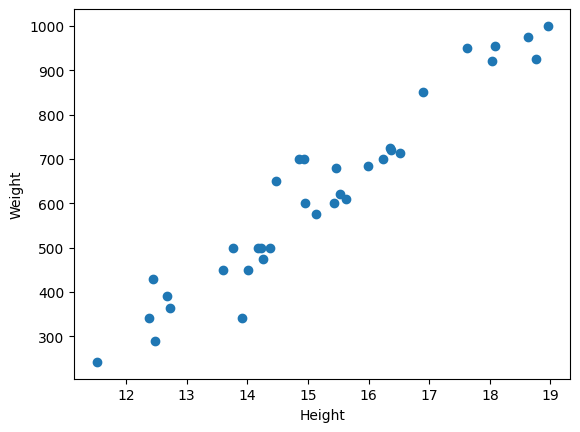

In [8]:
#Se guardan los datos en arrays especificando que son datos de tipo float
yi= np.array(fish['Weight'],dtype=float)
xi= np.array(fish['Height'],dtype=float)

#Se usan los datos para los ejes x e y
plt.plot(xi,yi,'o',label='(xi,yi)')

#Se colocan las etiquetas correspondientes en cada eje
plt.xlabel("Height")
plt.ylabel("Weight")

<h4>Ahora procedemos a calcular y guardar en variables las partes de la formula de minimos cuadrados:</h4>
<ul style="padding-left:50px;">
    <li>K1=∑xi*yi</li>
    <li>K2=∑xi^2</li>
    <li>K3=∑xi</li>
    <li>K4=∑yi</li>
</ul>

<h4>Para posteriormente usarlos en la formula para calcular los coeficientes de la función afin buscada: f= mx+b</h4>
<ul style="padding-left:50px;">
    <li>m=(k1 * n - k3 * k4) / (n * k2 - k3^2)</li>
    <li>b = (k4 * k2 - k3 * k1)/(n * k2 - k3^2)</li>
</ul>
<h4>Usando la libreria sympy vamos a crear la funcion afin buscada</h4>

In [10]:
#se crea n como el valor correspondiente a la cantidad de datos
n=len (xi)

#Se realizan los calculos de las sumatorias usando la funcion sum de numpy (itera por todos los elementos de xi e yi sumando las operaciones indicadas)
k3  = np.sum(xi)
k4  = np.sum(yi)
k1 = np.sum(xi*yi)
k2 = np.sum(xi**2)


#Se calcula m y b usando las formulas previamente dichas
m = (k1 * n - k3 * k4) / (n * k2 - k3**2)
b = (k4 * k2 - k3 * k1)/(n * k2 - k3**2)

#se crea el simbolo "x" para poder visualizar la función con ese símbolo
x = sym.Symbol('x')
f = m*x + b

#se imprime la función conseguida
print("Función Afin: ", f)

Función Afin:  102.704726417843*x - 941.559004487124


<h4>Se crea fx como la funcion afin para poderla evaluar con respecto a x, para posteriormente proceder a graficar tanto los datos iniciales como la función afin encontrada</h4>

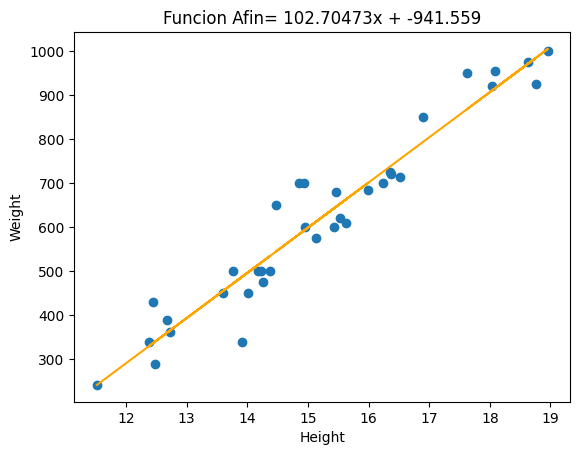

In [11]:
#Se crea la funcion para poder ser evaluada con respecto a x
fx = sym.lambdify(x,f)
#Se guardan los valores que se obtienen al evaluar la función afin con cada xi en fi
fi = fx(xi)
#Se crea el grafico con los datos iniciales
plt.plot(xi,yi,'o',label='(xi,yi)')

#Se colocan las etiquetas correspondientes en cada eje
plt.xlabel("Height")
plt.ylabel("Weight")
#Se coloca de titulo de la grafica la función afin conseguida
plt.title("Funcion Afin= " +  str(round(m,5)) +"x + " + str(round(b,5)))
#Se hace el grafico de la funcion afin evaluada en cada punto de xi
plt.plot(xi,fi, color='orange',  label=f)

<h1>📍 Parte 2. Descenso del gradiente</h1>

<h4>Para el método de descenso de gradiente se definen los valores iniciales necesarios, el learningRate (alpha), siendo el factor por el cual el algoritmo irá multiplicando sus resultados para ir consiguiendo un valor óptimo, inicialmente en 0.1, el criteria siendo la tolerancia por la cual el algoritmo va a parar si es menor a esta, y por ultimo se inicia m y b en 0 (siendo estos los coeficientes de la función afin)</h4>

In [12]:
# Definición de los ajustes y parámetros iniciales
learningRate = 0.1
criteria = 1e-10
b = 1
m = 1
max_iterations = 1000000

<h4>Se crea el ciclo principal, en el cual se van a realizar las operaciones correspondientes para sacar gradientes de m y b (sus derivadas parciales) con las sigueintes formulas: </h4>
<ul style="padding-left:50px;">
    <li>Gradiente de m= -(1/2*N) * ∑(yi - (b + m * xi)*xi)</li>
    <li>Gradiente de b= -(1/2*N) * ∑(yi - (b + m * xi))</li>
</ul>
<h4>Posteriormente verificamos si alguno de los gradientes es igual a infinito, lo cual significaria que la función no converge, en caso de que si sea infinito se reinicia el ciclo y se multiplica por el factor de corrección el factor de aprendizaje, culminando las iteraciones con el factor de aprendizaje óptimo, en caso contrario se sigue con las formulas para sacar m y b: </h4>

<ul style="padding-left:50px;">
    <li>m= m - (learningRate * m_gradient)</li>
    <li>b = b - (learningRate * b_gradient)</li>
</ul>

<h4>Por último se compara el error actual con el criterio, en caso de que sea menor el actual, se sale del ciclo, en caso contrario sigue</h4>

<h4>Al salir del ciclo, usando la libreria sympy, vamos a crear la funcion afin buscada</h4>

In [14]:
def calculate_gradient(xi, yi, b, m, learningRate, criteria, max_iterations, correction_factor=0.5):
    for h in range(0, max_iterations):
        #Se inicializan los parametros
        error = 1e5
        resetLoop=0
        m_gradient = 0
        b_gradient = 0
        #Se coloca N como la cantidad de datos
        N = float(len(xi))


        #Se calculan los gradientes con las formulas previamente dadas
        b_gradient = -(1/2*N) * np.sum((yi - (b + m * xi)))
        m_gradient = -(1/2*N) * np.sum((yi - (b + m * xi)) * xi)

        #Se comparan los resultados con el infinito para comprovar si no convergen
        if((m_gradient == float('inf') or m_gradient == float('-inf')) or
          (b_gradient == float('inf') or b_gradient == float('-inf'))):
            #se reinician los valores de m y b

            m=1
            b=1
            #se disminuye el learning rate
            learningRate = learningRate * correction_factor
            #se coloca en 1 el resetloop para que se salte las instrucciones de cambiar m y b, asi como el comprobar el error
            resetLoop=1


        #Se comprueba si el ciclo va a seguir o no
        if(resetLoop==0):
            #se utilizan las formulas previamente dadas para calcular m y b
            m = m - (learningRate * m_gradient)
            b = b - (learningRate * b_gradient)

            #se compara el error actual con el criterio, si es menor se sale del ciclo
            error = max(abs(learningRate * m_gradient), abs(learningRate * b_gradient))
            if error < criteria:
                break

    return m, b, error, learningRate, h
#se crea el simbolo "x" para poder visualizar la función con ese símbolo
x = sym.Symbol('x')

(m, b, error, learningRate, iterations) = calculate_gradient(xi, yi, b, m, learningRate, criteria, max_iterations)
f = m*x + b
print("El factor de aprendizaje óptimo es: ", learningRate)
print("El número de iteraciones necesarias fue: ", iterations)
#se imprime la función conseguida
print("Función Afin: ", f)

El factor de aprendizaje óptimo es:  1.220703125e-05
El número de iteraciones necesarias fue:  0
Función Afin:  102.704726363469*x - 941.559003648187


<h4>Se crea fx como la funcion afin para poderla evaluar con respecto a x, para posteriormente proceder a graficar tanto los datos iniciales como la función afin encontrada</h4>

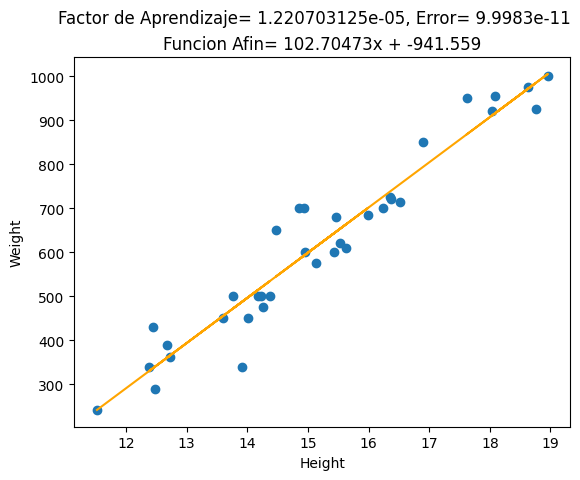

In [15]:
#Se crea la funcion para poder ser evaluada con respecto a x
fx = sym.lambdify(x,f)
#Se guardan los valores que se obtienen al evaluar la función afin con cada xi en fi
fi = fx(xi)
#Se crea el grafico con los datos iniciales
plt.plot(xi,yi,'o',label='(xi,yi)')

#Se colocan las etiquetas correspondientes en cada eje
plt.xlabel("Height")
plt.ylabel("Weight")
#Se coloca de titulo de la grafica la función afin conseguida
plt.title("Funcion Afin= " +  str(round(m,5)) +"x + " + str(round(b,5)))
#Se coloca de subtitulo el valor final del factor de aprendizaje y el error
plt.suptitle("Factor de Aprendizaje= "+ str(round(learningRate,15))+ ", Error= "+ str(round(error,15)))
#Se hace el grafico de la funcion afin evaluada en cada punto de xi
plt.plot(xi,fi, color='orange',  label=f)



<h1>📍Parte 3. Descenso del gradiente estocastico</h1>